# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

# Imports

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

## Step 1: Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train_4.csv', index_col = 0)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,...,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,no_bld_code_std,custom_bld_desgin,grade_6,grade_7,grade_8,grade_9,grade_10,has_basement,has_renovation,bedroom_squared,bathroom_squared
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,2014,Oct,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,16.0,5.0625
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,2014,Aug,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,25.0,9.0000
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,2014,Aug,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16.0,6.2500
3,9522300010,1490000.0,3.0,3.50,4560,14608,2.0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,2015,Mar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9.0,12.2500
4,9510861140,711000.0,3.0,2.50,2550,5376,2.0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,2014,Jul,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.0,6.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,750000.0,5.0,2.50,3240,9960,1.0,1,3,8,2020,1220,1958,0,47.5858,-122.112,2730,10400,2015,Mar,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,25.0,6.2500
17286,8819900270,440000.0,2.0,1.75,1300,4000,2.0,0,3,7,1300,0,1948,0,47.6687,-122.288,1350,4013,2014,May,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,3.0625
17287,3816300095,310000.0,3.0,1.00,1050,9876,1.0,0,3,7,1050,0,1953,0,47.7635,-122.262,1760,9403,2014,May,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9.0,1.0000
17288,122069107,427500.0,3.0,1.50,1900,43186,1.5,0,4,7,1300,600,1971,0,47.4199,-121.990,2080,108028,2014

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [3]:
leave = ['price','bedrooms', 'bathrooms', 'mnth_sold', 'id', 
         'view', 'grade', 'sqft_basement', 'yr_renovated', 
         'long', 'lat', 'no_bld_code_std', 'custom_bld_desgin',
         'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10']
features = [x for x in df.columns if x not in leave]
print(leave)
print(features)

['price', 'bedrooms', 'bathrooms', 'mnth_sold', 'id', 'view', 'grade', 'sqft_basement', 'yr_renovated', 'long', 'lat', 'no_bld_code_std', 'custom_bld_desgin', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10']
['sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 'yr_sold', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zi

In [4]:
df[features]

,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,sqft_living15,sqft_lot15,yr_sold,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,has_basement,has_renovation,bedroom_squared,bathroom_squared
0,2070,8893,2.0,4,2070,1986,2390,7700,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0,5.0625
1,2900,6730,1.0,5,1830,1977,2370,6283,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,25.0,9.0000
2,3770,10893,2.0,3,3770,1997,3710,9685,2014,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0,6.2500
3,4560,14608,2.0,3,4560,1990,4050,14226,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,12.2500
4,2550,5376,2.0,3,2550,2004,2250,4050,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,6.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,3240,9960,1.0,3,2020,1958,2730,10400,2015,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,25.0,6.2500
17286,1300,4000,2.0,3,1300,1948,1350,4013,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,3.0625
17287,1050,9876,1.0,3,1050,1953,1760,9403,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0000
17288,1900,43186,1.5,4,1300,1971,2080,108028,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9.0,2.2500


### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [5]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)

In [6]:
poly2_data = poly2.fit_transform(df[features])


poly2_columns = poly2.get_feature_names(features)

df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)

df_poly2.head()

,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,sqft_living15,sqft_lot15,yr_sold,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,...,zipcode_98177 waterfront_1,zipcode_98177 has_basement,zipcode_98177 has_renovation,zipcode_98177 bedroom_squared,zipcode_98177 bathroom_squared,zipcode_98178^2,zipcode_98178 zipcode_98188,zipcode_98178 zipcode_98198,zipcode_98178 zipcode_98199,zipcode_98178 waterfront_1,zipcode_98178 has_basement,zipcode_98178 has_renovation,zipcode_98178 bedroom_squared,zipcode_98178 bathroom_squared,zipcode_98188^2,zipcode_98188 zipcode_98198,zipcode_98188 zipcode_98199,zipcode_98188 waterfront_1,zipcode_98188 has_basement,zipcode_98188 has_renovation,zipcode_98188 bedroom_squared,zipcode_98188 bathroom_squared,zipcode_98198^2,zipcode_98198 zipcode_98199,zipcode_98198 waterfront_1,zipcode_98198 has_basement,zipcode_98198 has_renovation,zipcode_98198 bedroom_squared,zipcode_98198 bathroom_squared,zipcode_98199^2,zipcode_98199 waterfront_1,zipcode_98199 has_basement,zipcode_98199 has_renovation,zipcode_98199 bedroom_squared,zipcode_98199 bathroom_squared,waterfront_1^2,waterfront_1 has_basement,waterfront_1 has_renovation,waterfront_1 bedroom_squared,waterfront_1 bathroom_squared,has_basement^2,has_basement has_renovation,has_basement bedroom_squared,has_basement bathroom_squared,has_renovation^2,has_renovation bedroom_squared,has_renovation bathroom_squared,bedroom_squared^2,bedroom_squared bathroom_squared,bathroom_squared^2
0,2070.0,8893.0,2.0,4.0,2070.0,1986.0,2390.0,7700.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,81.00,25.628906
1,2900.0,6730.0,1.0,5.0,1830.0,1977.0,2370.0,6283.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,9.0,0.0,0.0,0.0,625.0,225.00,81.000000
2,3770.0,10893.0,2.0,3.0,3770.0,1997.0,3710.0,9685.0,2014.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,100.00,39.062500
3,4560.0,14608.0,2.0,3.0,4560.0,1990.0,4050.0,14226.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,110.25,150.062500
4,2550.0,5376.0,2.0,3.0,2550.0,2004.0,2250.0,4050.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [7]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

In [8]:
#call train_test_split on the data and capture the results
X_poly2_train, X_poly2_test, y_train, y_test = train_test_split(df_poly2, df['price'], random_state=34,test_size=0.2)

In [9]:
#check the shape of the results
print("Training set - Features: ", X_poly2_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", X_poly2_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 3569) Target:  (13832,)
Testing set - Features:  (3458, 3569) Target:  (3458,)


### 5.1) Perform a train-test split of the data.

### 5.2) Fit your scaler to training the data.

In [10]:
# from sklearn.preprocessing import StandardScaler

poly2_scaler = StandardScaler()


#fit and transform the training data
Xs_poly2_train = pd.DataFrame(data=poly2_scaler.fit_transform(X_poly2_train), columns=df_poly2.columns)


### 5.3) Transform the testing set with the scaler.

In [11]:
#transform the testing dat
Xs_poly2_test = pd.DataFrame(data=poly2_scaler.transform(X_poly2_test), columns=df_poly2.columns)

### 5.4) Fit the model to the training data.

In [12]:
# instantiate a linear regression object
lm_poly2 = LinearRegression()

#fit the linear regression to the data
lm_poly2 = lm_poly2.fit(X_poly2_train, y_train)

y_train_pred = lm_poly2.predict(X_poly2_train)

poly2_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Polynomial Training Root Mean Squared Error:' , poly2_train_rmse)

Polynomial Training Root Mean Squared Error: 113717.28382927367


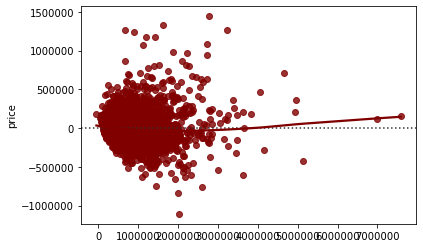

In [13]:
sns.residplot(y_train_pred, y_train, lowess=True, color="maroon")

### 5.5) Use the model to predict on the training set and the test set.

In [14]:
y_train_pred = lm_poly2.predict(X_poly2_train)
y_test_pred = lm_poly2.predict(X_poly2_test)

poly2_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
poly2_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

### 5.6) Evaluate the training and test predictions using RMSE.

In [15]:
print('Polynomial Training Root Mean Squared Error:' , poly2_train_rmse)
print('Polynomial Testing Root Mean Squared Error:' , poly2_test_rmse)

Polynomial Training Root Mean Squared Error: 113717.28382927367
Polynomial Testing Root Mean Squared Error: 149015.52114323515


### 5.7) Determine if your model is overfit.

In [16]:
print('Training: ', int(poly2_train_rmse), "vs. Testing: ", int(poly2_test_rmse))

Training:  113717 vs. Testing:  149015


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

# KBest

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=300) # select the 200 best features using their f-statistic

selector.fit(X_poly2_train, y_train)

C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=300, score_func=<function f_regression at 0x000002368B020158>)

In [18]:
selected_poly2_columns = X_poly2_train.columns[selector.get_support()] # shows me all the columns htat are kept
removed_poly2_columns = X_poly2_train.columns[~selector.get_support()] # shows me all the columns htat are not kept
Xsc_poly2_train = X_poly2_train[selected_poly2_columns]
Xsc_poly2_test = X_poly2_test[selected_poly2_columns]

In [19]:
#instantiate a linear regression object
lm_poly2_kbest = LinearRegression()

#fit the linear regression to the data
lm_poly2_kbest.fit(Xsc_poly2_train, y_train)

y_train_kbest = lm_poly2_kbest.predict(Xsc_poly2_train)


p2_trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , p2_trainK_rmse)

y_kbest = lm_poly2_kbest.predict(Xsc_poly2_test)

p2_testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , p2_testK_rmse)




Training Root Mean Squared Error: 153195.21811847878
Testing Root Mean Squared Error: 163655.41636979193


### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [20]:
df[features].shape

(17290, 83)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


[variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
vif["features"] = df[features].columns
vif.round(1)

,VIF Factor,features
0,104.7,sqft_living
1,2.3,sqft_lot
2,20.4,floors
3,36.8,condition
4,93.4,sqft_above
5,11803.9,yr_built
6,28.0,sqft_living15
7,2.7,sqft_lot15
8,12068.2,yr_sold
9,1.6,zipcode_98002


In [22]:
from sklearn.feature_selection import RFECV

ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7, scoring='neg_mean_squared_error', n_jobs=10, verbose=0)

# Fit recursive feature eliminator 
selector.fit(Xsc_poly2_train, y_train)

RFECV(cv=7,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=10, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [23]:
selected_poly2_rfe = Xsc_poly2_train.columns[selector.support_]
removed_poly2_rfe = Xsc_poly2_train.columns[~selector.support_]

In [24]:
list(removed_poly2_rfe)

len(list(selected_poly2_rfe))

285

## Step 7: Evaluate your different models in order to determine the best model overall.

In [25]:
#instantiate a linear regression object
lm_poly2_rfe = LinearRegression()

#fit the linear regression to the data
lm_poly2_rfe = lm_poly2_rfe.fit(X_poly2_train[selected_poly2_rfe], y_train)

y_rfe = lm_poly2_rfe.predict(X_poly2_train[selected_poly2_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_poly2_rfe.predict(X_poly2_test[selected_poly2_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)




Training Root Mean Squared Error: 153943.72428127166
Testing Root Mean Squared Error: 165292.96226981154


## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/